In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv


In [5]:
train_data=pd.read_csv("../input/titanic/train.csv")
test_data=pd.read_csv("../input/titanic/test.csv")

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
print(train_data.shape)
print(test_data.shape)

(891, 12)
(418, 11)


In [7]:
print(train_data.isnull().sum())
print(test_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [8]:
train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

**CHARTS**

In [9]:
def chart (feature):
    alive=train_data[train_data['Survived']==1][feature].value_counts()
    dead=train_data[train_data['Survived']==0][feature].value_counts()
    plot_data= pd.DataFrame([alive, dead])
    plot_data.index=['Survived','Dead']
    plot_data.plot(kind='bar',stacked=True, figsize=(10,5))

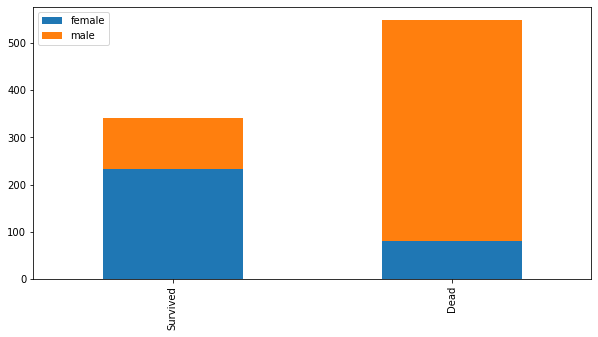

In [10]:
chart("Sex")

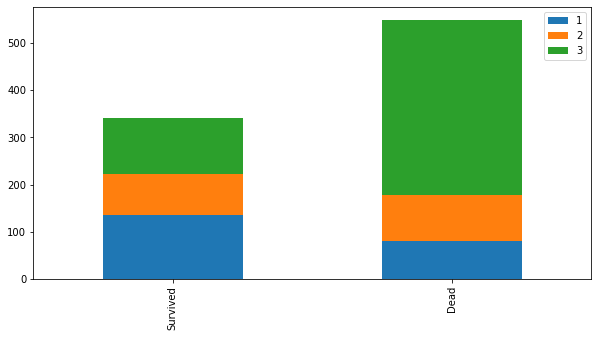

In [11]:
chart('Pclass')

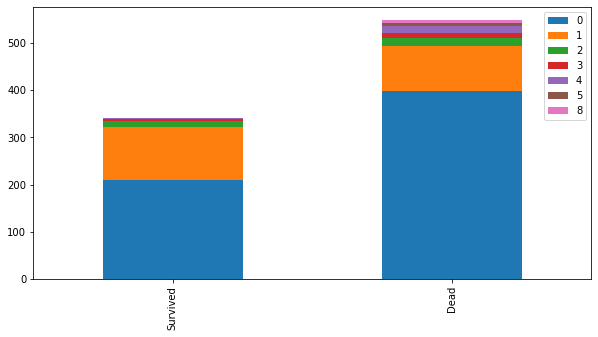

In [12]:
chart('SibSp')

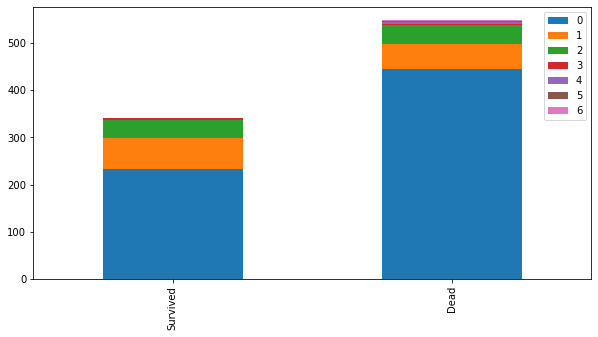

In [13]:
chart('Parch')

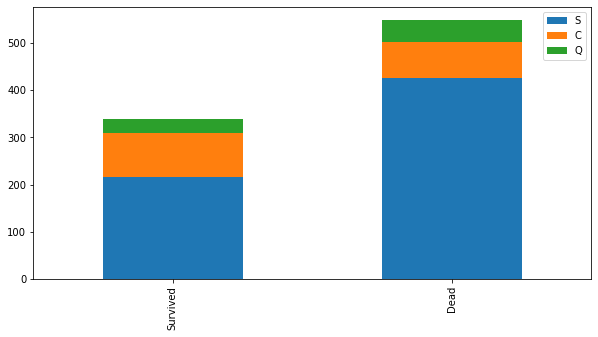

In [14]:
chart('Embarked')

**Feature Selection and Combination**

In [15]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
train_test_data = [train_data, test_data] # combining train and test dataset

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [17]:

train_data['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Sir           1
Mme           1
Lady          1
Ms            1
Capt          1
Don           1
Countess      1
Jonkheer      1
Name: Title, dtype: int64

In [18]:
test_data['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Ms          1
Dona        1
Dr          1
Name: Title, dtype: int64

In [19]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [20]:
train_data.head()
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


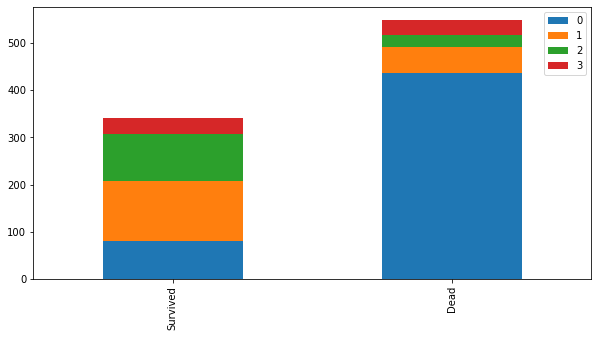

In [21]:
chart('Title')

In [22]:
train_data.drop('Name', axis=1, inplace=True)
test_data.drop('Name', axis=1, inplace=True)

In [23]:
train_data.head()
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,2


In [24]:
Sex_map={'male':0, 'female':1}
train_data['Sex']=train_data.Sex.map(Sex_map)
test_data['Sex']=test_data.Sex.map(Sex_map)

In [25]:
print(train_data.head())


   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch            Ticket  \
0            1         0       3    0  22.0      1      0         A/5 21171   
1            2         1       1    1  38.0      1      0          PC 17599   
2            3         1       3    1  26.0      0      0  STON/O2. 3101282   
3            4         1       1    1  35.0      1      0            113803   
4            5         0       3    0  35.0      0      0            373450   

      Fare Cabin Embarked  Title  
0   7.2500   NaN        S      0  
1  71.2833   C85        C      2  
2   7.9250   NaN        S      1  
3  53.1000  C123        S      2  
4   8.0500   NaN        S      0  


In [26]:
train_data.drop('Ticket', axis=1, inplace=True)
test_data.drop('Ticket', axis=1, inplace=True)

In [27]:
print(train_data.head())

   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare Cabin  \
0            1         0       3    0  22.0      1      0   7.2500   NaN   
1            2         1       1    1  38.0      1      0  71.2833   C85   
2            3         1       3    1  26.0      0      0   7.9250   NaN   
3            4         1       1    1  35.0      1      0  53.1000  C123   
4            5         0       3    0  35.0      0      0   8.0500   NaN   

  Embarked  Title  
0        S      0  
1        C      2  
2        S      1  
3        S      2  
4        S      0  


In [28]:
train_data["Age"].fillna(train_data.groupby("Title")["Age"].transform("median"), inplace=True)
test_data["Age"].fillna(test_data.groupby("Title")["Age"].transform("median"), inplace=True)

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

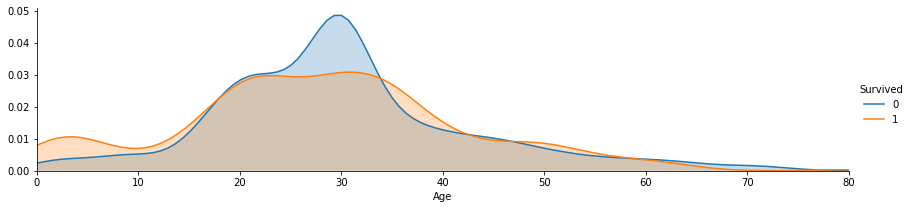

In [31]:
facet = sns.FacetGrid(train_data, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train_data['Age'].max()))
facet.add_legend()
 
plt.show()

In [32]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Cabin        204 non-null    object 
 9   Embarked     889 non-null    object 
 10  Title        891 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 76.7+ KB


In [33]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         417 non-null    float64
 7   Cabin        91 non-null     object 
 8   Embarked     418 non-null    object 
 9   Title        418 non-null    int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 32.8+ KB


In [34]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,8.0500,NaN,S,0


In [38]:
def age_map(age):
    print(age)
    if age<=16:
        a=0
    elif (age>16 and age<=26):
        a= 1
    elif (age>26 and age<=36):
        a= 2
    elif (age>36 and age<=60):
        a= 3
    else:
        a= 4
    return a
    
train_data['Age']=train_data['Age'].map(age_map)

22.0
38.0
26.0
35.0
35.0
30.0
54.0
2.0
27.0
14.0
4.0
58.0
20.0
39.0
14.0
55.0
2.0
30.0
31.0
35.0
35.0
34.0
15.0
28.0
8.0
38.0
30.0
19.0
21.0
30.0
40.0
35.0
21.0
66.0
28.0
42.0
30.0
21.0
18.0
14.0
40.0
27.0
30.0
3.0
19.0
30.0
30.0
21.0
30.0
18.0
7.0
21.0
49.0
29.0
65.0
30.0
21.0
28.5
5.0
11.0
22.0
38.0
45.0
4.0
30.0
9.0
29.0
19.0
17.0
26.0
32.0
16.0
21.0
26.0
32.0
25.0
30.0
30.0
0.83
30.0
22.0
29.0
21.0
28.0
17.0
33.0
16.0
30.0
23.0
24.0
29.0
20.0
46.0
26.0
59.0
30.0
71.0
23.0
34.0
34.0
28.0
30.0
21.0
33.0
37.0
28.0
21.0
30.0
38.0
21.0
47.0
14.5
22.0
20.0
17.0
21.0
70.5
29.0
24.0
2.0
21.0
30.0
32.5
32.5
54.0
12.0
30.0
24.0
21.0
45.0
33.0
20.0
47.0
29.0
25.0
23.0
19.0
37.0
16.0
24.0
35.0
22.0
24.0
19.0
18.0
19.0
27.0
9.0
36.5
42.0
51.0
22.0
55.5
40.5
30.0
51.0
16.0
30.0
30.0
9.0
44.0
40.0
26.0
17.0
1.0
9.0
35.0
45.0
30.0
28.0
61.0
4.0
1.0
21.0
56.0
18.0
9.0
50.0
30.0
36.0
21.0
30.0
9.0
1.0
4.0
30.0
35.0
45.0
40.0
36.0
32.0
19.0
19.0
3.0
44.0
58.0
30.0
42.0
21.0
24.0
28.0
30.0
34.0
45.5
1

In [39]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,1,0,3,0,1,1,0,7.2500,NaN,S,0
1,2,1,1,1,3,1,0,71.2833,C85,C,2
2,3,1,3,1,1,0,0,7.9250,NaN,S,1
3,4,1,1,1,2,1,0,53.1000,C123,S,2
4,5,0,3,0,2,0,0,8.0500,NaN,S,0


In [40]:
test_data['Age']=test_data['Age'].map(age_map)
test_data.head()

34.5
47.0
62.0
27.0
22.0
14.0
30.0
26.0
18.0
21.0
28.5
46.0
23.0
63.0
47.0
24.0
35.0
21.0
27.0
45.0
55.0
9.0
36.5
21.0
48.0
50.0
22.0
22.5
41.0
28.5
50.0
24.0
33.0
36.5
30.0
18.5
22.0
21.0
25.0
28.5
39.0
28.5
41.0
30.0
45.0
25.0
45.0
28.5
60.0
36.0
24.0
27.0
20.0
28.0
28.5
10.0
35.0
25.0
28.5
36.0
17.0
32.0
18.0
22.0
13.0
36.5
18.0
47.0
31.0
60.0
24.0
21.0
29.0
28.5
35.0
32.5
28.5
55.0
30.0
24.0
6.0
67.0
49.0
28.5
28.5
28.5
27.0
18.0
10.0
2.0
22.0
28.5
27.0
28.5
25.0
25.0
76.0
29.0
20.0
33.0
43.0
27.0
28.5
26.0
16.0
28.0
21.0
28.5
28.5
18.5
41.0
22.0
36.0
18.5
63.0
18.0
28.5
1.0
36.0
29.0
12.0
28.5
35.0
28.0
28.5
17.0
22.0
22.0
42.0
24.0
32.0
53.0
36.5
28.5
43.0
24.0
26.5
26.0
23.0
40.0
10.0
33.0
61.0
28.0
42.0
31.0
28.5
22.0
28.5
30.0
23.0
28.5
60.5
36.0
13.0
24.0
29.0
23.0
42.0
26.0
22.0
7.0
26.0
28.5
41.0
26.0
48.0
18.0
36.5
22.0
28.5
27.0
23.0
28.5
40.0
15.0
20.0
54.0
36.0
64.0
30.0
37.0
18.0
28.5
27.0
40.0
21.0
17.0
22.0
40.0
34.0
28.5
11.5
61.0
8.0
33.0
6.0
18.0
23.0
36.5
22.0
0.

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,892,3,0,2,0,0,7.8292,NaN,Q,0
1,893,3,1,3,1,0,7.0000,NaN,S,2
2,894,2,0,4,0,0,9.6875,NaN,Q,0
3,895,3,0,2,0,0,8.6625,NaN,S,0
4,896,3,1,1,1,1,12.2875,NaN,S,2


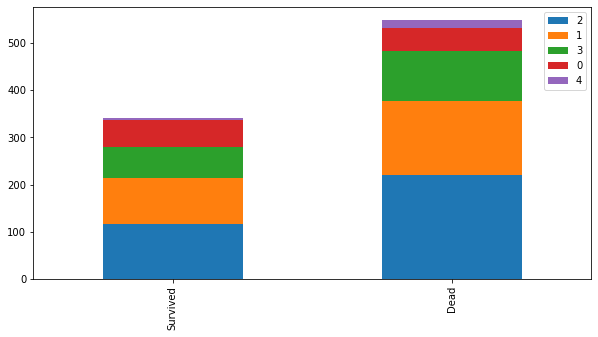

In [41]:
chart('Age')

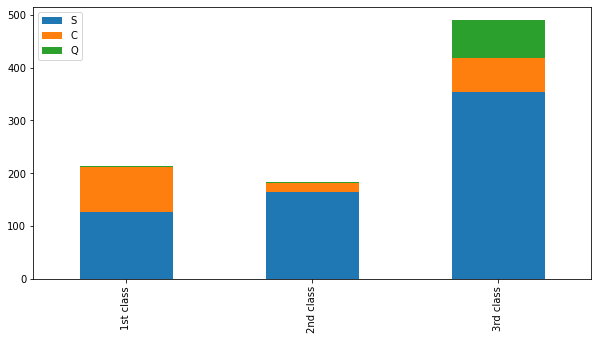

In [42]:
Pclass1 = train_data[train_data['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train_data[train_data['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train_data[train_data['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [43]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [46]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    int64  
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Cabin        204 non-null    object 
 9   Embarked     891 non-null    object 
 10  Title        891 non-null    int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 76.7+ KB


In [47]:
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

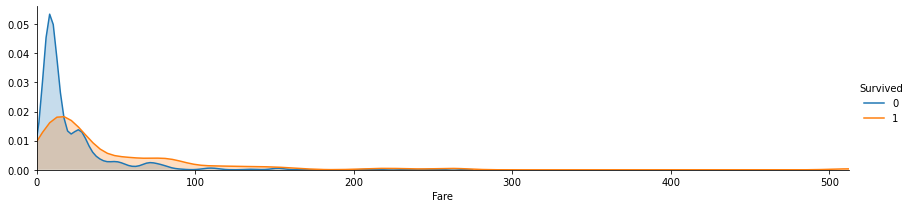

In [49]:
facet = sns.FacetGrid(train_data, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train_data['Fare'].max()))
facet.add_legend()
 
plt.show()

In [51]:
def fare_map(age):
    
    if age<=17:
        a=0
    elif (age>17 and age<=30):
        a= 1
    elif (age>30 and age<=100):
        a= 2
    else:
        a= 3
    return a
    
train_data['Fare']=train_data['Fare'].map(fare_map)
test_data['Fare']=test_data['Fare'].map(fare_map)

In [53]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,1,0,3,0,1,1,0,0,NaN,0,0
1,2,1,1,1,3,1,0,2,C85,1,2
2,3,1,3,1,1,0,0,0,NaN,0,1
3,4,1,1,1,2,1,0,2,C123,0,2
4,5,0,3,0,2,0,0,0,NaN,0,0


In [55]:
train_data.Cabin.value_counts()

G6             4
C23 C25 C27    4
B96 B98        4
F2             3
C22 C26        3
              ..
E49            1
E36            1
B42            1
B41            1
B102           1
Name: Cabin, Length: 147, dtype: int64

In [56]:
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

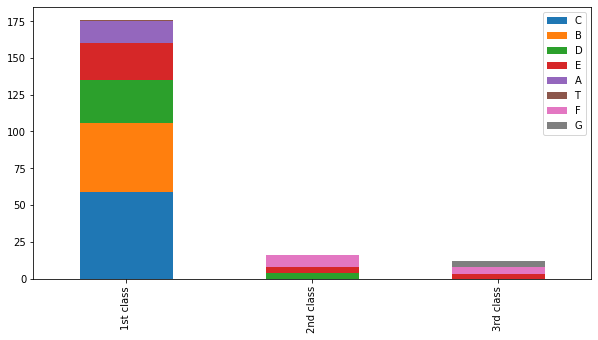

In [59]:
Pclass1 = train_data[train_data['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train_data[train_data['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train_data[train_data['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [60]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [62]:
# fill missing Fare with median fare for each Pclass
train_data["Cabin"].fillna(train_data.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test_data["Cabin"].fillna(test_data.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

In [64]:
train_data["FamilySize"] = train_data["SibSp"] + train_data["Parch"] + 1
test_data["FamilySize"] = test_data["SibSp"] + test_data["Parch"] + 1

(0.0, 11.0)

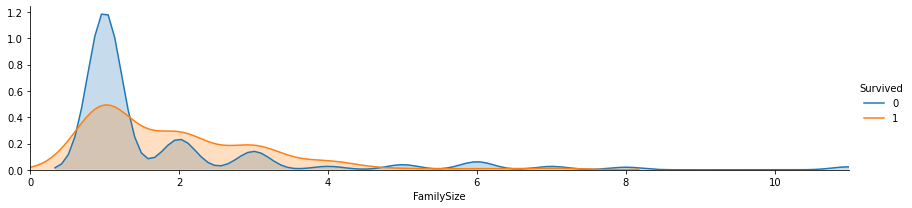

In [66]:
facet = sns.FacetGrid(train_data, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'FamilySize',shade= True)
facet.set(xlim=(0, train_data['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

In [67]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [68]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1,1,0,0,2.0,0,0,0.4
1,2,1,1,1,3,1,0,2,0.8,1,2,0.4
2,3,1,3,1,1,0,0,0,2.0,0,1,0.0
3,4,1,1,1,2,1,0,2,0.8,0,2,0.4
4,5,0,3,0,2,0,0,0,2.0,0,0,0.0


In [71]:
features_drop = ['SibSp', 'Parch']
train_data = train_data.drop(features_drop, axis=1)
test_data = test_data.drop(features_drop, axis=1)
train_data = train_data.drop(['PassengerId'], axis=1)

In [72]:
train_data.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,0,3,0,1,0,2.0,0,0,0.4
1,1,1,1,3,2,0.8,1,2,0.4
2,1,3,1,1,0,2.0,0,1,0.0
3,1,1,1,2,2,0.8,0,2,0.4
4,0,3,0,2,0,2.0,0,0,0.0


In [73]:
test_data.head()

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,892,3,0,2,0,2.0,2,0,0.0
1,893,3,1,3,0,2.0,0,2,0.4
2,894,2,0,4,0,2.0,2,0,0.0
3,895,3,0,2,0,2.0,0,0,0.0
4,896,3,1,1,0,2.0,0,2,0.8


In [75]:
train_final = train_data.drop('Survived', axis=1)
target = train_data['Survived']

train_final.shape, target.shape

((891, 8), (891,))

MODELLING

In [76]:
# Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

In [77]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [78]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, train_final, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.82222222 0.76404494 0.80898876 0.83146067 0.86516854 0.82022472
 0.85393258 0.79775281 0.84269663 0.84269663]


In [79]:
round(np.mean(score)*100, 2)

82.49

In [80]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_final, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.76666667 0.83146067 0.76404494 0.78651685 0.86516854 0.75280899
 0.83146067 0.82022472 0.73033708 0.79775281]


In [81]:
round(np.mean(score)*100, 2)

79.46

In [83]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, train_final, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.8        0.82022472 0.76404494 0.78651685 0.86516854 0.78651685
 0.82022472 0.7752809  0.76404494 0.82022472]


In [84]:
round(np.mean(score)*100, 2)

80.02

In [86]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, train_final, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.85555556 0.74157303 0.75280899 0.75280899 0.70786517 0.80898876
 0.76404494 0.80898876 0.86516854 0.83146067]


In [87]:
round(np.mean(score)*100, 2)

78.89

In [88]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, train_final, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.83333333 0.79775281 0.83146067 0.82022472 0.84269663 0.82022472
 0.84269663 0.85393258 0.84269663 0.86516854]


In [89]:
round(np.mean(score)*100,2)

83.5

In [91]:
clf = SVC()
clf.fit(train_final, target)

test_final = test_data.drop("PassengerId", axis=1).copy()
prediction = clf.predict(test_final)

In [92]:
submission = pd.DataFrame({
        "PassengerId": test_data["PassengerId"],
        "Survived": prediction
    })

submission.to_csv('submission.csv', index=False)

In [ ]:
submission = pd.read_csv('submission.csv')
submission.head()